In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Loadind the Data Set
data = pd.read_csv("C:/Users/Shanmugaraj/Dropbox/Project Files/Dataset3.csv")

In [3]:
# To See the dimension of the dataset
print(data.shape)

(303, 14)


In [4]:
# See the column names
print(data.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [5]:
#To view the first 5 lines of the dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#To print information of all columns
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
None


In [7]:
#To see whether we have any missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#To describe a numerical series
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
data['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

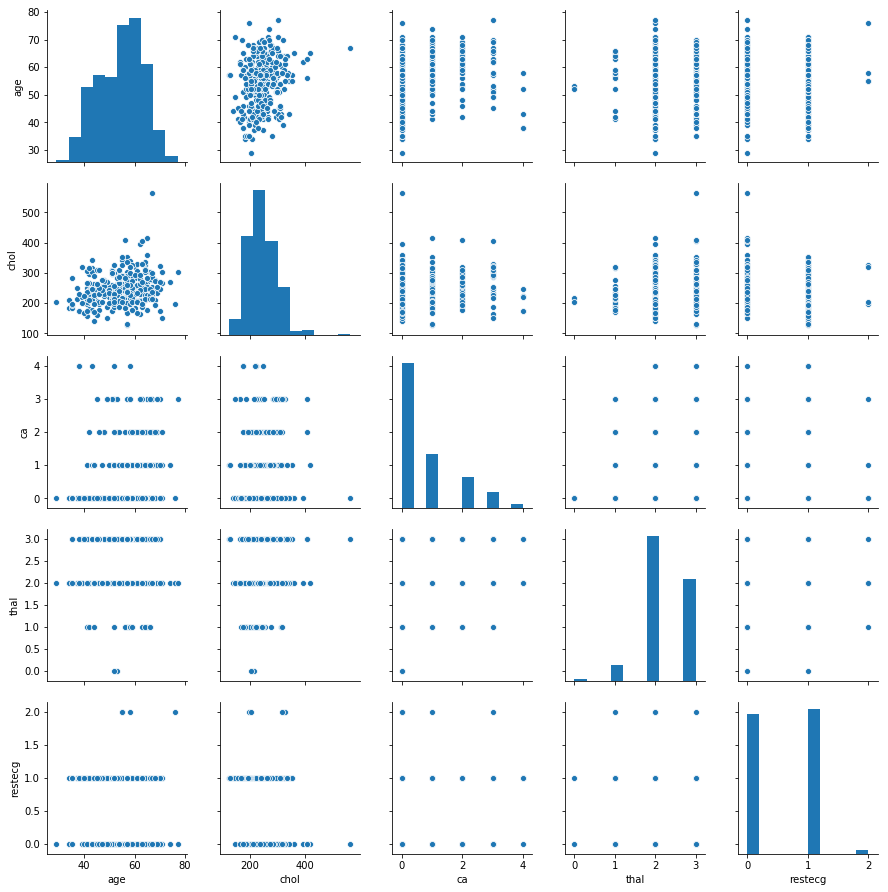

In [11]:
# `pairplot()` 
%config InlineBackend.figure_format = 'png' 
sns.pairplot(data[['age', 'chol', 'ca', 
                 'thal', 'restecg']]);

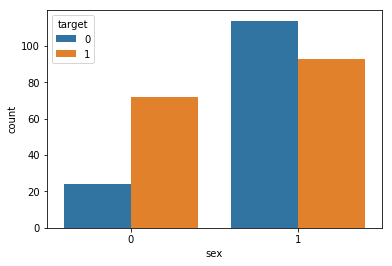

In [12]:
sns.countplot(x='sex', hue= 'target', data=data)

In [13]:
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

In [14]:
y = data.target.copy() # copy “y” column values out
X = data.drop(['target'], axis=1) # then, drop y 
from sklearn.model_selection import train_test_split
  # 80 % go into the training test, 20% in the validation test
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=7)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((242, 13), (61, 13), (242,), (61,))

In [33]:
#Feature selection
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("C:/Users/Shanmugaraj/Dropbox/Project Files/Dataset3.csv")
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column 
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

      Specs       Score
7   thalach  188.320472
9   oldpeak   72.644253
11       ca   66.440765
2        cp   62.598098
8     exang   38.914377


In [25]:
# Decision Tree Classifier
start = time.time()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
y_pred_class = dtc.predict(X_test)
from sklearn import metrics

# Accuracy

print("Accuracy", metrics.accuracy_score(y_test, y_pred_class))

end = time.time()
print("Program Execution time in Seconds ")
print(end - start)

Accuracy 0.8064516129032258
Program Execution time in Seconds 
0.003986358642578125


In [19]:
#Adaboost classifier
start = time.time()
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

abc = AdaBoostClassifier()

abc.fit(X_train, y_train)

y_pred = abc.predict(X_test)

accuracy_score(y_pred, y_test)
print(accuracy_score(y_pred, y_test))
end = time.time()
print("Execution time in Seconds ")
print(end - start)

0.7741935483870968
Execution time in Seconds 
0.054052114486694336


In [23]:
#SVM
start = time.time()
from sklearn.svm import SVC
svm = SVC(kernel='linear')

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

# Accuracy calculation
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_test)
acc
end = time.time()
print("Execution time in Seconds - ", end-start)
print("Accuracy = ", acc)

Execution time in Seconds  1.2752604484558105
Accuracy =  0.8064516129032258
